# How Do People Die in the USA? A Visualization of Mortality

**Death** is a difficult topic, but it is crucial for government, healthcare, economy, and medicine. Understanding how people die can lead to changes in research funding or strengthening preventive measures against certain contemporary diseases.

In the USA, **Centers for Disease Control and Prevention (CDC)** collected [mortality data](https://wonder.cdc.gov/ucd-icd10.html) from 1999 to 2015. The data is rich in demographic information, including age at death, the disease causing it, gender, race, and geographical location (city/state).

This data will help us answer many **questions about death**:
- What are the leading causes of death in the USA?
- Are men or women more likely to die? Does it depend on the cause of death? Or the age?
- Which causes of death are becoming more or less common over time?

## Import library **Matplotlib**

To begin with, I installed all the necessary libraries for constructing graphs.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

import sys

## Data Output

First, I open file `deaths.csv`:

In [3]:
df = pd.read_csv("data/deaths.csv", encoding='GBK') 
df

,Cause,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Salmonella infections,GR113-001,0,F,2005,0,1956682,Unreliable
1,Salmonella infections,GR113-001,0,F,2010,1,1929877,Unreliable
2,Salmonella infections,GR113-001,0,F,2015,3,1942904,Unreliable
3,Salmonella infections,GR113-001,1,F,2005,0,1950494,Unreliable
4,Salmonella infections,GR113-001,1,F,2010,0,1947217,Unreliable
...,...,...,...,...,...,...,...,...
30901,Enterocolitis due to Clostridium difficile,GR113-136,99,M,2010,6,Not Applicable,Not Applicable
30902,Enterocolitis due to Clostridium difficile,GR113-136,99,M,2015,7,Not Applicable,Not Applicable
30903,Enterocolitis due to Clostridium difficile,GR113-136,100,M,2005,8,Not Applicable,Not Applicable
30904,Enterocolitis due to Clostridium difficile,GR113-136,100,M,2010,4,Not Applicable,Not Applicable


## Data Exploring

#### Top 10 lines:

In [3]:
df.head(10)

,Cause,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Salmonella infections,GR113-001,0,F,2005,0,1956682,Unreliable
1,Salmonella infections,GR113-001,0,F,2010,1,1929877,Unreliable
2,Salmonella infections,GR113-001,0,F,2015,3,1942904,Unreliable
3,Salmonella infections,GR113-001,1,F,2005,0,1950494,Unreliable
4,Salmonella infections,GR113-001,1,F,2010,0,1947217,Unreliable
5,Salmonella infections,GR113-001,1,F,2015,0,1939269,Unreliable
6,Salmonella infections,GR113-001,2,F,2005,0,1932337,Unreliable
7,Salmonella infections,GR113-001,2,F,2010,0,2004731,Unreliable
8,Salmonella infections,GR113-001,2,F,2015,0,1939979,Unreliable
9,Salmonella infections,GR113-001,3,F,2005,0,1930395,Unreliable


#### The bottom 5 rows:

In [5]:
df.tail(5)

,Cause,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
30901,Enterocolitis due to Clostridium difficile,GR113-136,99,M,2010,6,Not Applicable,Not Applicable
30902,Enterocolitis due to Clostridium difficile,GR113-136,99,M,2015,7,Not Applicable,Not Applicable
30903,Enterocolitis due to Clostridium difficile,GR113-136,100,M,2005,8,Not Applicable,Not Applicable
30904,Enterocolitis due to Clostridium difficile,GR113-136,100,M,2010,4,Not Applicable,Not Applicable
30905,Enterocolitis due to Clostridium difficile,GR113-136,100,M,2015,14,Not Applicable,Not Applicable


#### Range of age values in the data:

In [6]:
df.Age.describe()

count    30906.000000
mean        50.000000
std         29.155231
min          0.000000
25%         25.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: Age, dtype: float64

#### Years represented in the dataset:

In [7]:
df['Year'].unique()

array([2005, 2010, 2015])

#### Are both genders represented in the dataset?

In [8]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

#### Key statistical characteristics of the number of deaths:

In [9]:
count_deaths = df['Deaths'].count()
print('Number of deaths:', count_deaths)
mean_deaths = df['Deaths'].mean()
print('The average number of deaths:', mean_deaths)
std_deaths = df['Deaths'].std()
print('Standard deviation:', std_deaths)
min_deaths = df['Deaths'].min()
print('Minimum number of deaths:', min_deaths)
max_deaths = df['Deaths'].max()
print('Maximum number of deaths:', max_deaths)

Number of deaths: 30906
The average number of deaths: 211.6365107098945
Standard deviation: 930.9590870854269
Minimum number of deaths: 0
Maximum number of deaths: 13846


#### Causes of death represented in the dataset:

In [10]:
causes = pd.DataFrame(df['Cause'].unique(), columns=['Death Cause'])
causes = causes.sort_values(by='Death Cause')
causes.index = range(0, len(causes)) 
causes

,Death Cause
0,Accidents (unintentional injuries)
1,Acute bronchitis and bronchiolitis
2,Acute poliomyelitis
3,Alzheimer's disease
4,Anemias
5,Aortic aneurysm and dissection
6,Arthropod-borne viral encephalitis
7,Assault (homicide)
8,Atherosclerosis
9,Cerebrovascular diseases


## Deaths: by year

In [11]:
df.head(3)

,Cause,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Salmonella infections,GR113-001,0,F,2005,0,1956682,Unreliable
1,Salmonella infections,GR113-001,0,F,2010,1,1929877,Unreliable
2,Salmonella infections,GR113-001,0,F,2015,3,1942904,Unreliable


#### The total number of deaths recorded for 2005, 2010, and 2015?

First, I grouped the data by years, then separately, I determined the total deaths by year based on the **Deaths** column.

In [12]:
by_year = df.groupby("Year").Deaths.sum()
by_year

Year
2005    2143662
2010    2102234
2015    2294942
Name: Deaths, dtype: int64

After grouping, building plots is easy. Using **`.plot()`**, I just need to choose the type of plot:

<Axes: xlabel='Year'>

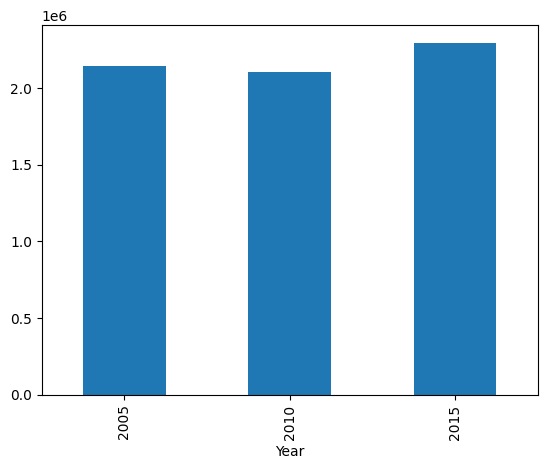

In [14]:
df.groupby("Year")\
.Deaths\
.sum()\
.plot(kind="bar")

## Divide the data by years

First of all, narrow down my investigation to **fatalities for the year 2015**.

## Deaths: Men vs Women

Which gender had the highest mortality rate in 2015?

In [15]:
df2015 = df[df.Year == 2015]

df2015\
.groupby("Gender")\
.Deaths\
.sum()

Gender
F    1103789
M    1191153
Name: Deaths, dtype: int64

#### Now, I create a simple bar chart to compare the total number of deaths by gender.

<Axes: xlabel='Gender'>

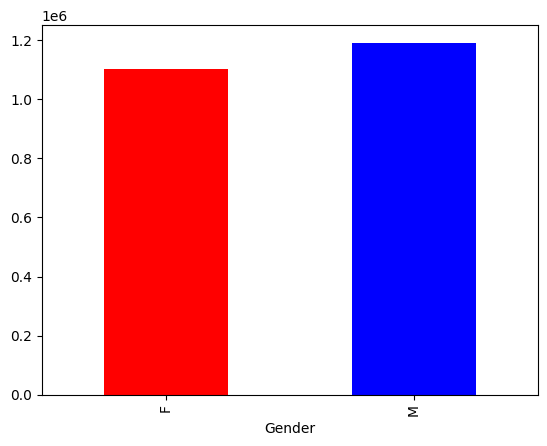

In [17]:
df2015\
.groupby("Gender")\
.Deaths\
.sum()\
.plot(kind="bar", color=["red", "blue"])

## Mortality: by age

What caused people to die in 2015?

In [18]:
causes = df2015.groupby('Cause')['Deaths'].sum().reset_index()
causes

,Cause,Deaths
0,Accidents (unintentional injuries),146553
1,Acute bronchitis and bronchiolitis,273
2,Acute poliomyelitis,0
3,Alzheimer's disease,110561
4,Anemias,5250
5,Aortic aneurysm and dissection,9988
6,Arthropod-borne viral encephalitis,3
7,Assault (homicide),17789
8,Atherosclerosis,6088
9,Cerebrovascular diseases,140315


Or in another way:

<Axes: xlabel='Cause'>

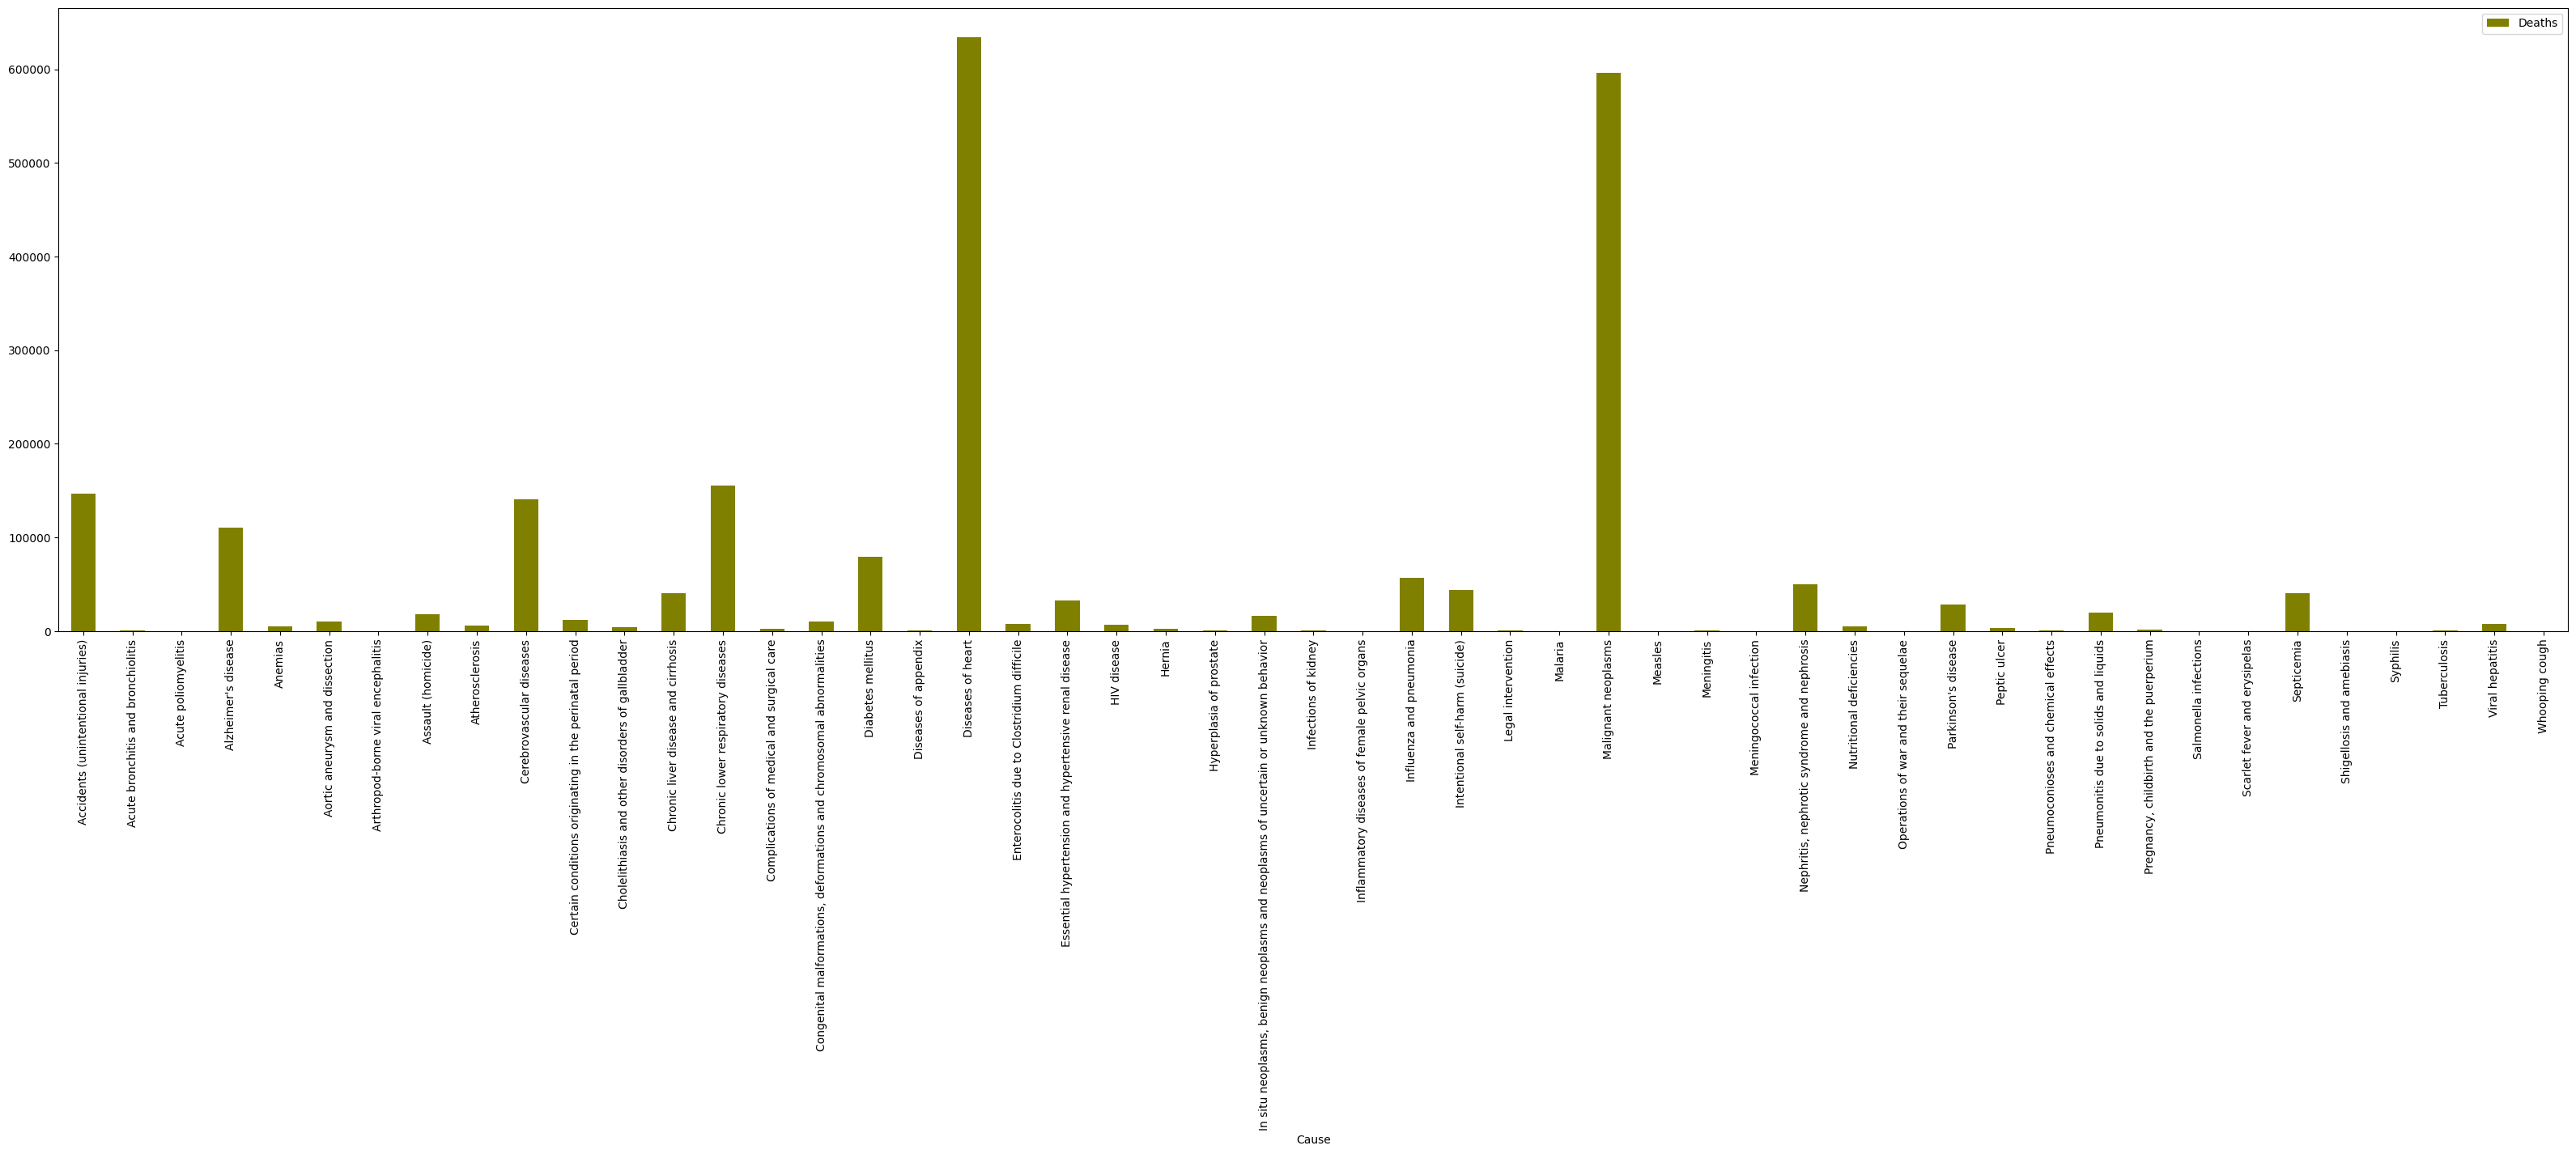

In [19]:
causes.set_index('Cause').plot(kind='bar', color='olive', figsize=[40, 10])

<font color="green"> **Conclusions**:</font>
1. The most prevalent diseases - heart disease, malignant neoplasms.
2. The least prevalent - acute poliomyelitis; arthropod-borne viral encephalitis; measles; scarlet fever and diphtheria. </font>

## Mortality: by age and gender

#### Does gender affect the age of death?

In [20]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()

Age  Gender
0    F          8634
     M         10512
1    F           470
     M           645
2    F           335
               ...  
98   M          3669
99   F          7685
     M          2506
100  F         16615
     M          3985
Name: Deaths, Length: 202, dtype: int64

#### Create two subplots - one for female and one for male mortality by age accordingly.

array([<Axes: title={'center': 'F'}, xlabel='Age'>,
       <Axes: title={'center': 'M'}, xlabel='Age'>], dtype=object)

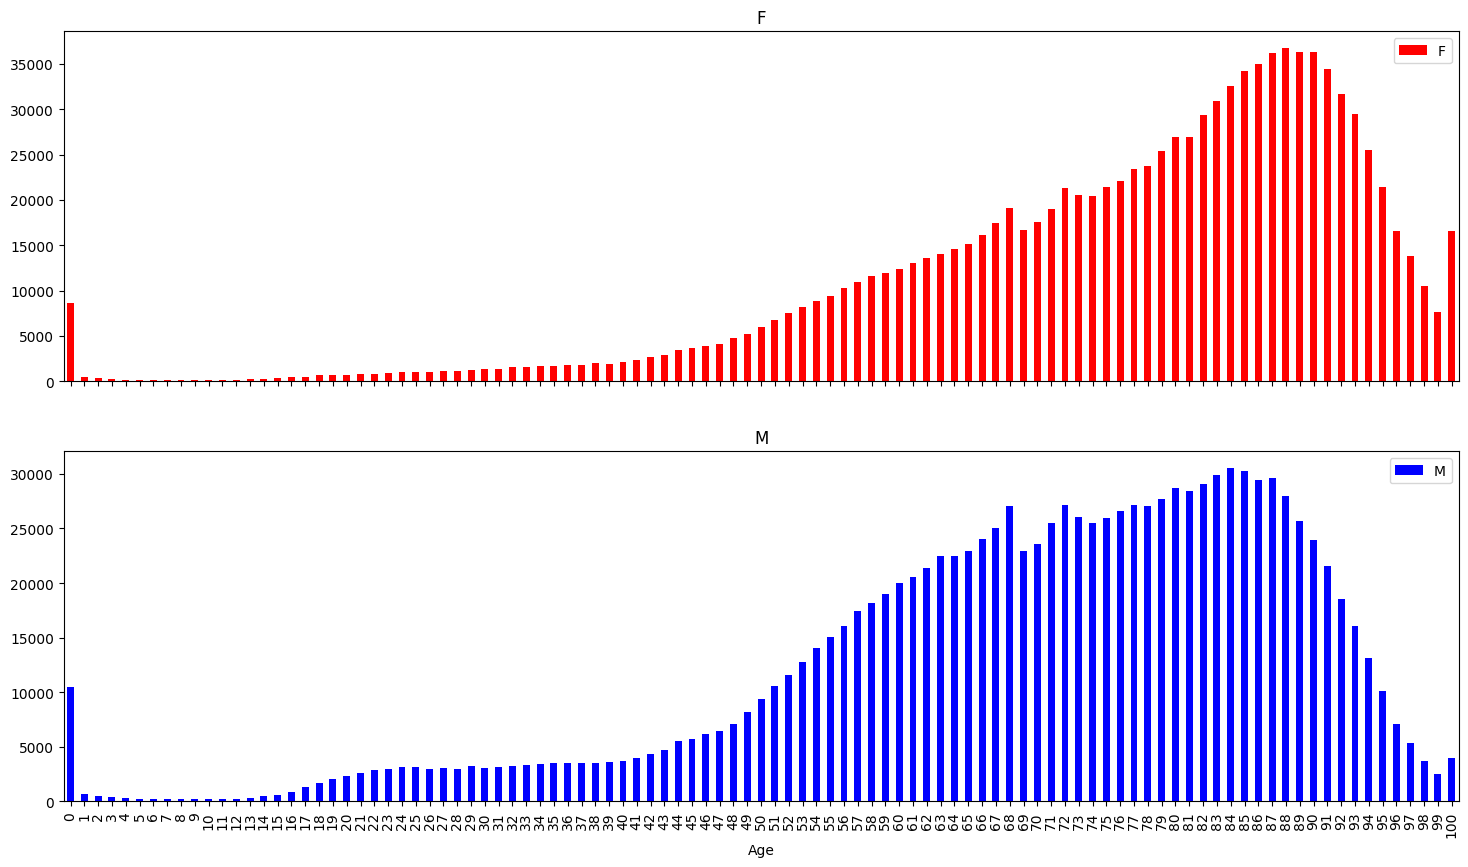

In [21]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind="bar", color=["red", "blue"], figsize=[18, 10], subplots=True)

<font color="green"> **Conclusions**: </font>
1. First months of life: males (higher mortality).
2. Up to 13 years old: approximately the same.
3. Up to 84 years old: males (higher mortality).
4. Up to 100 years old: females (higher mortality).

<Axes: xlabel='Age'>

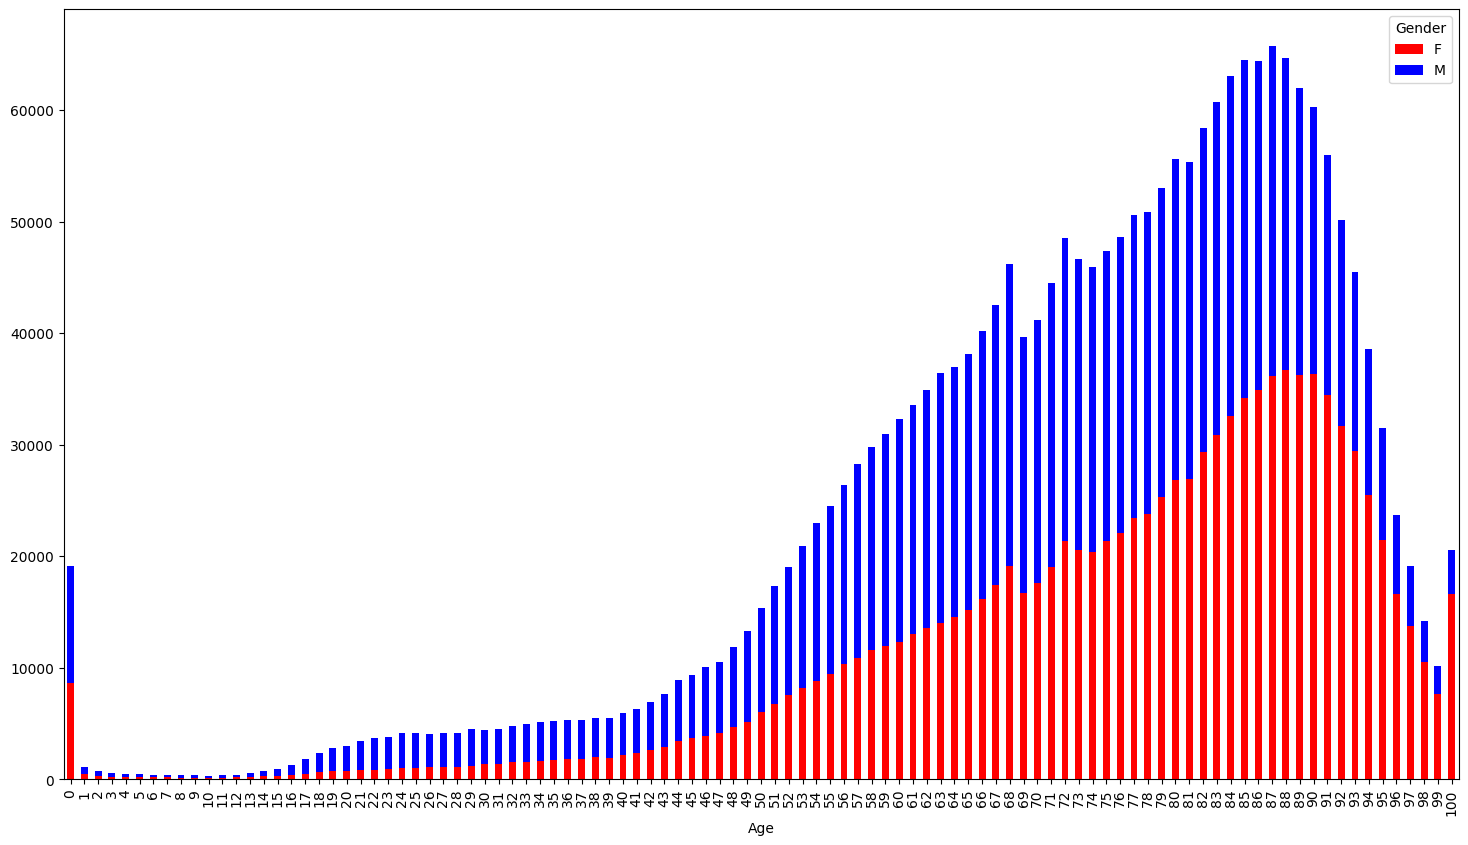

In [22]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind="bar", color=["red", "blue"], figsize=[18, 10], stacked=True)

I would combine the two graphs... 
However, it's not very informative because it's difficult to compare male and female indicators in a single bar chart.

<font color="green"> **That would be suitable for**: </font>
1. Comparison of one characteristic across different types.
2. Sales of different types of products across different points.

#### Since `Age` is a continuous variable, it would be appropriate to use a line plot for comparison.

array([<Axes: xlabel='Age'>, <Axes: xlabel='Age'>], dtype=object)

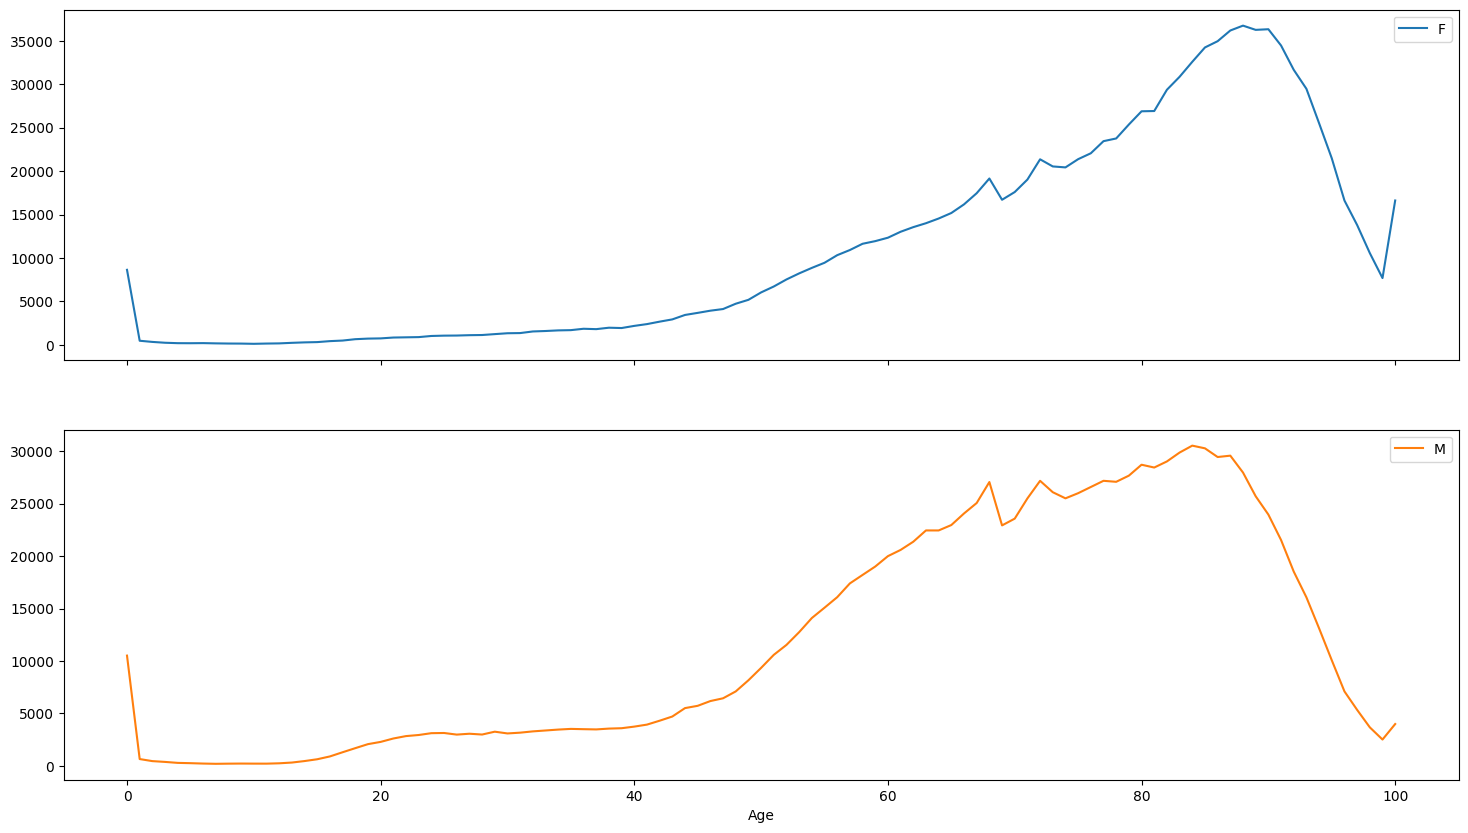

In [23]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind="line", figsize=[18, 10], subplots=True)

Now, using only lines, it's easy to compare the difference between genders by age on **one line graph**.

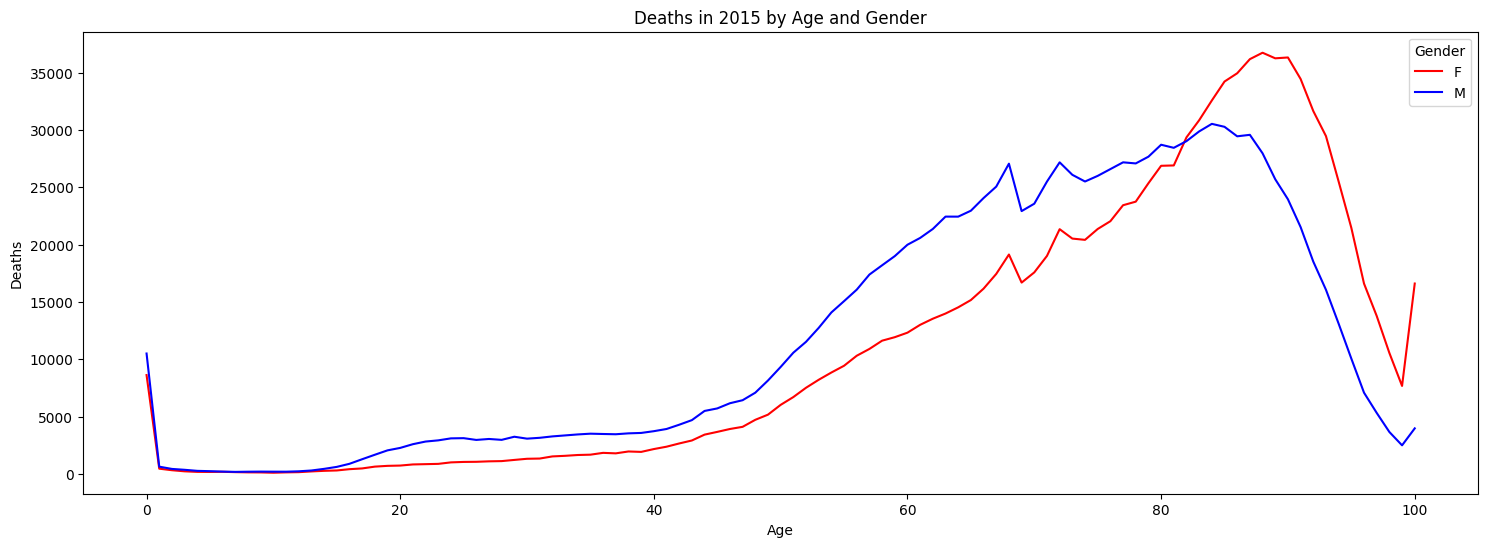

In [25]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind="line", color=["red", "blue"], figsize=[18, 6], title = "Deaths in 2015 by Age and Gender")

plt.ylabel('Deaths')
plt.show()

## Mortality: Top causes of death in 2015

<Axes: ylabel='Cause'>

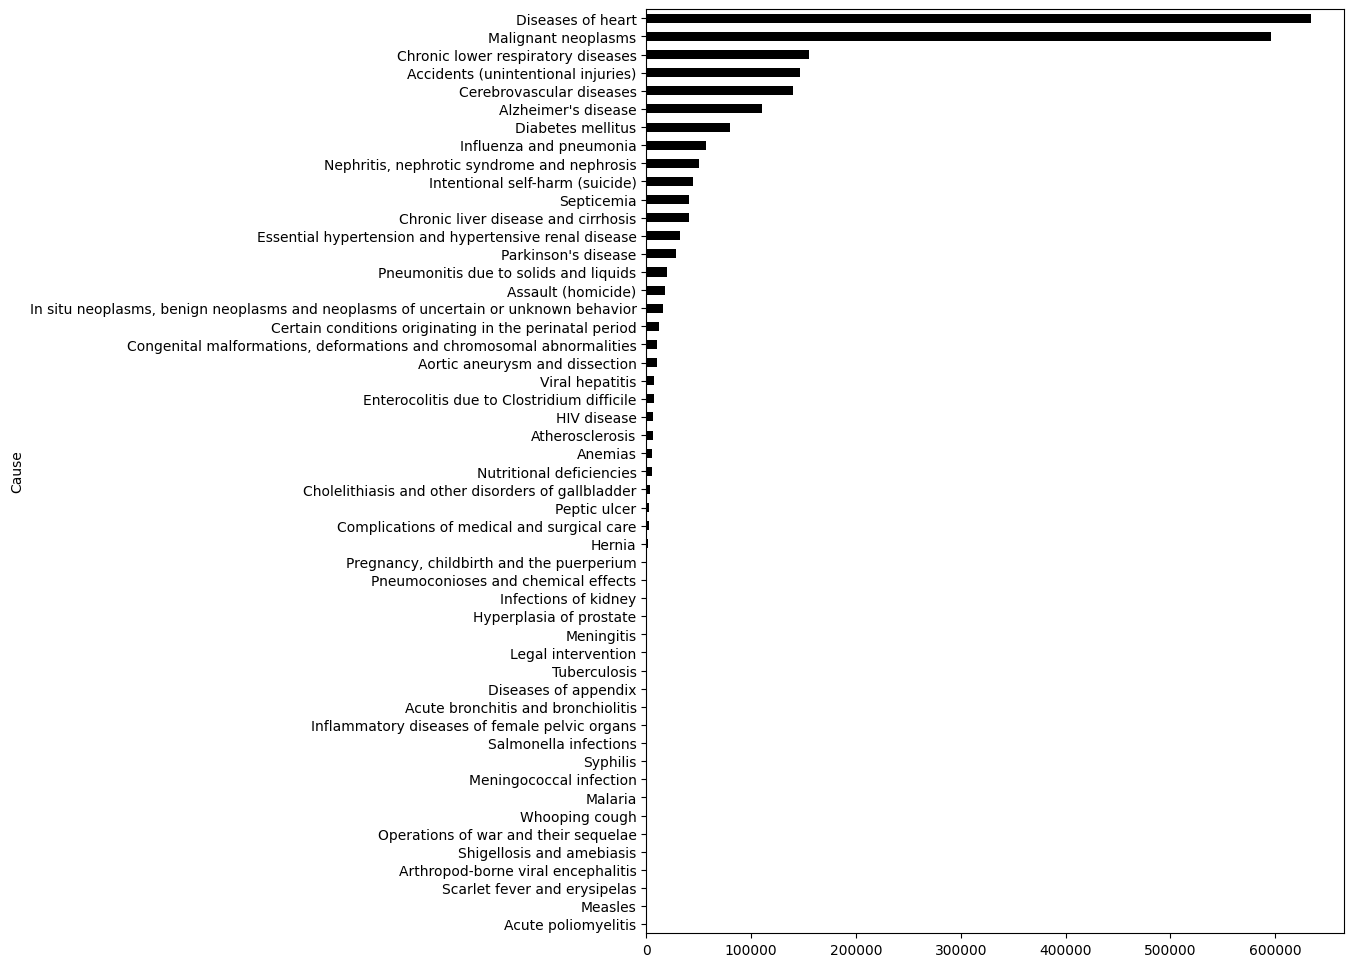

In [30]:
df2015\
.groupby(["Cause"])\
.agg({'Deaths' : 'sum'}).sort_values('Deaths', ascending=True)\
.plot(kind="barh", legend=False, color="black", figsize=[9, 12])

#### Top 10 most prevalent causes of mortality:

<Axes: ylabel='Cause'>

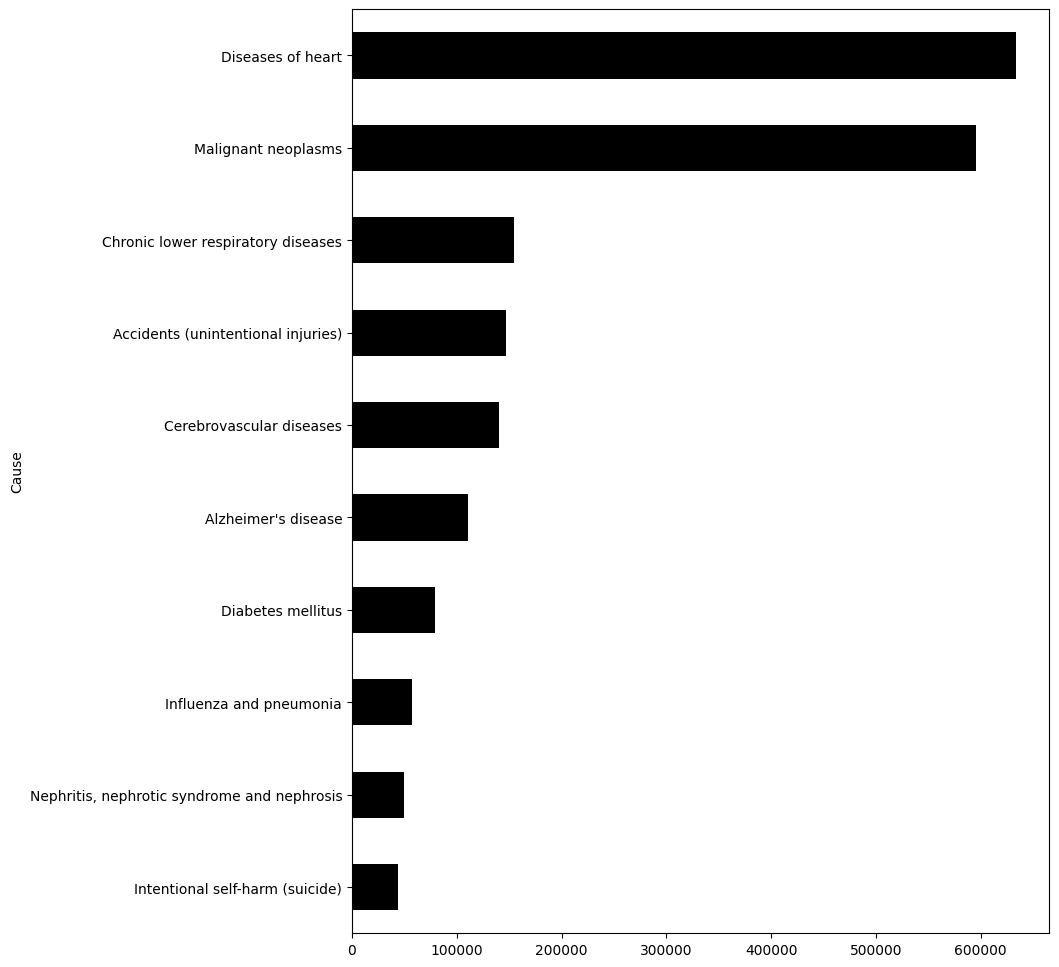

In [31]:
df2015\
.groupby(['Cause'])\
.agg({'Deaths' : 'sum'})\
.sort_values('Deaths', ascending=True) [-10:]\
.plot(kind="barh", legend=False, color="black", figsize=[9, 12])

## Mortality: Top causes of death by age

<Axes: ylabel='Cause'>

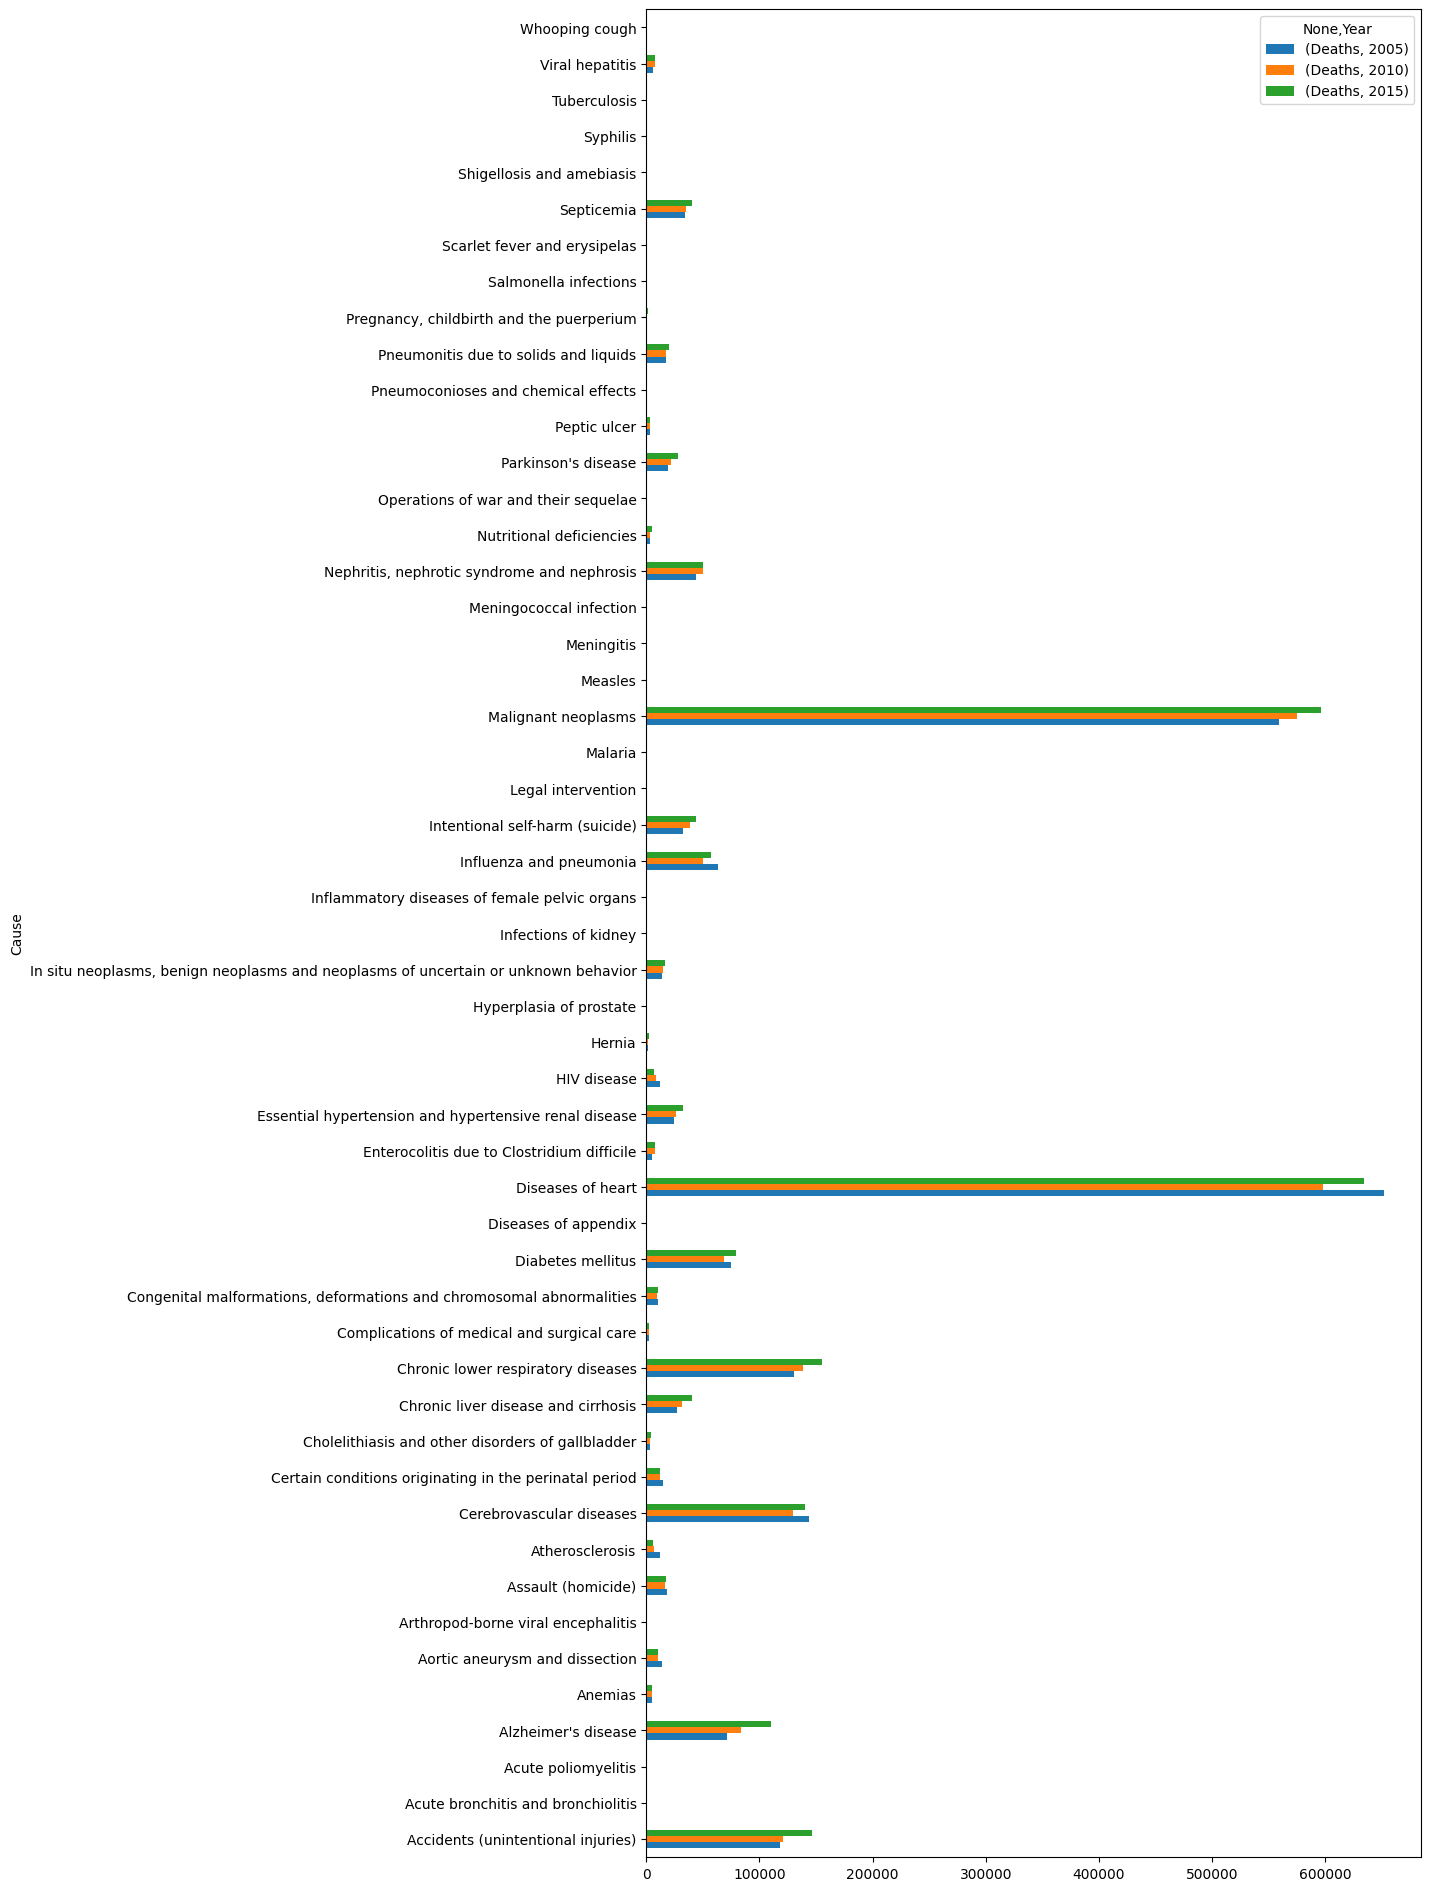

In [32]:
df\
.groupby(["Cause","Year"])\
.agg({'Deaths': 'sum'})\
.sort_values('Deaths', ascending = False)\
.unstack(1)\
.plot(kind="barh", legend=True, figsize=[10, 24])

The visualization above contains a lot of information (perhaps too much). However, it's easy to notice that **mortality due to HIV infection has been decreasing every 5 years, starting from 2005!**

## Mortality: Causes of death by gender

<Axes: ylabel='Cause'>

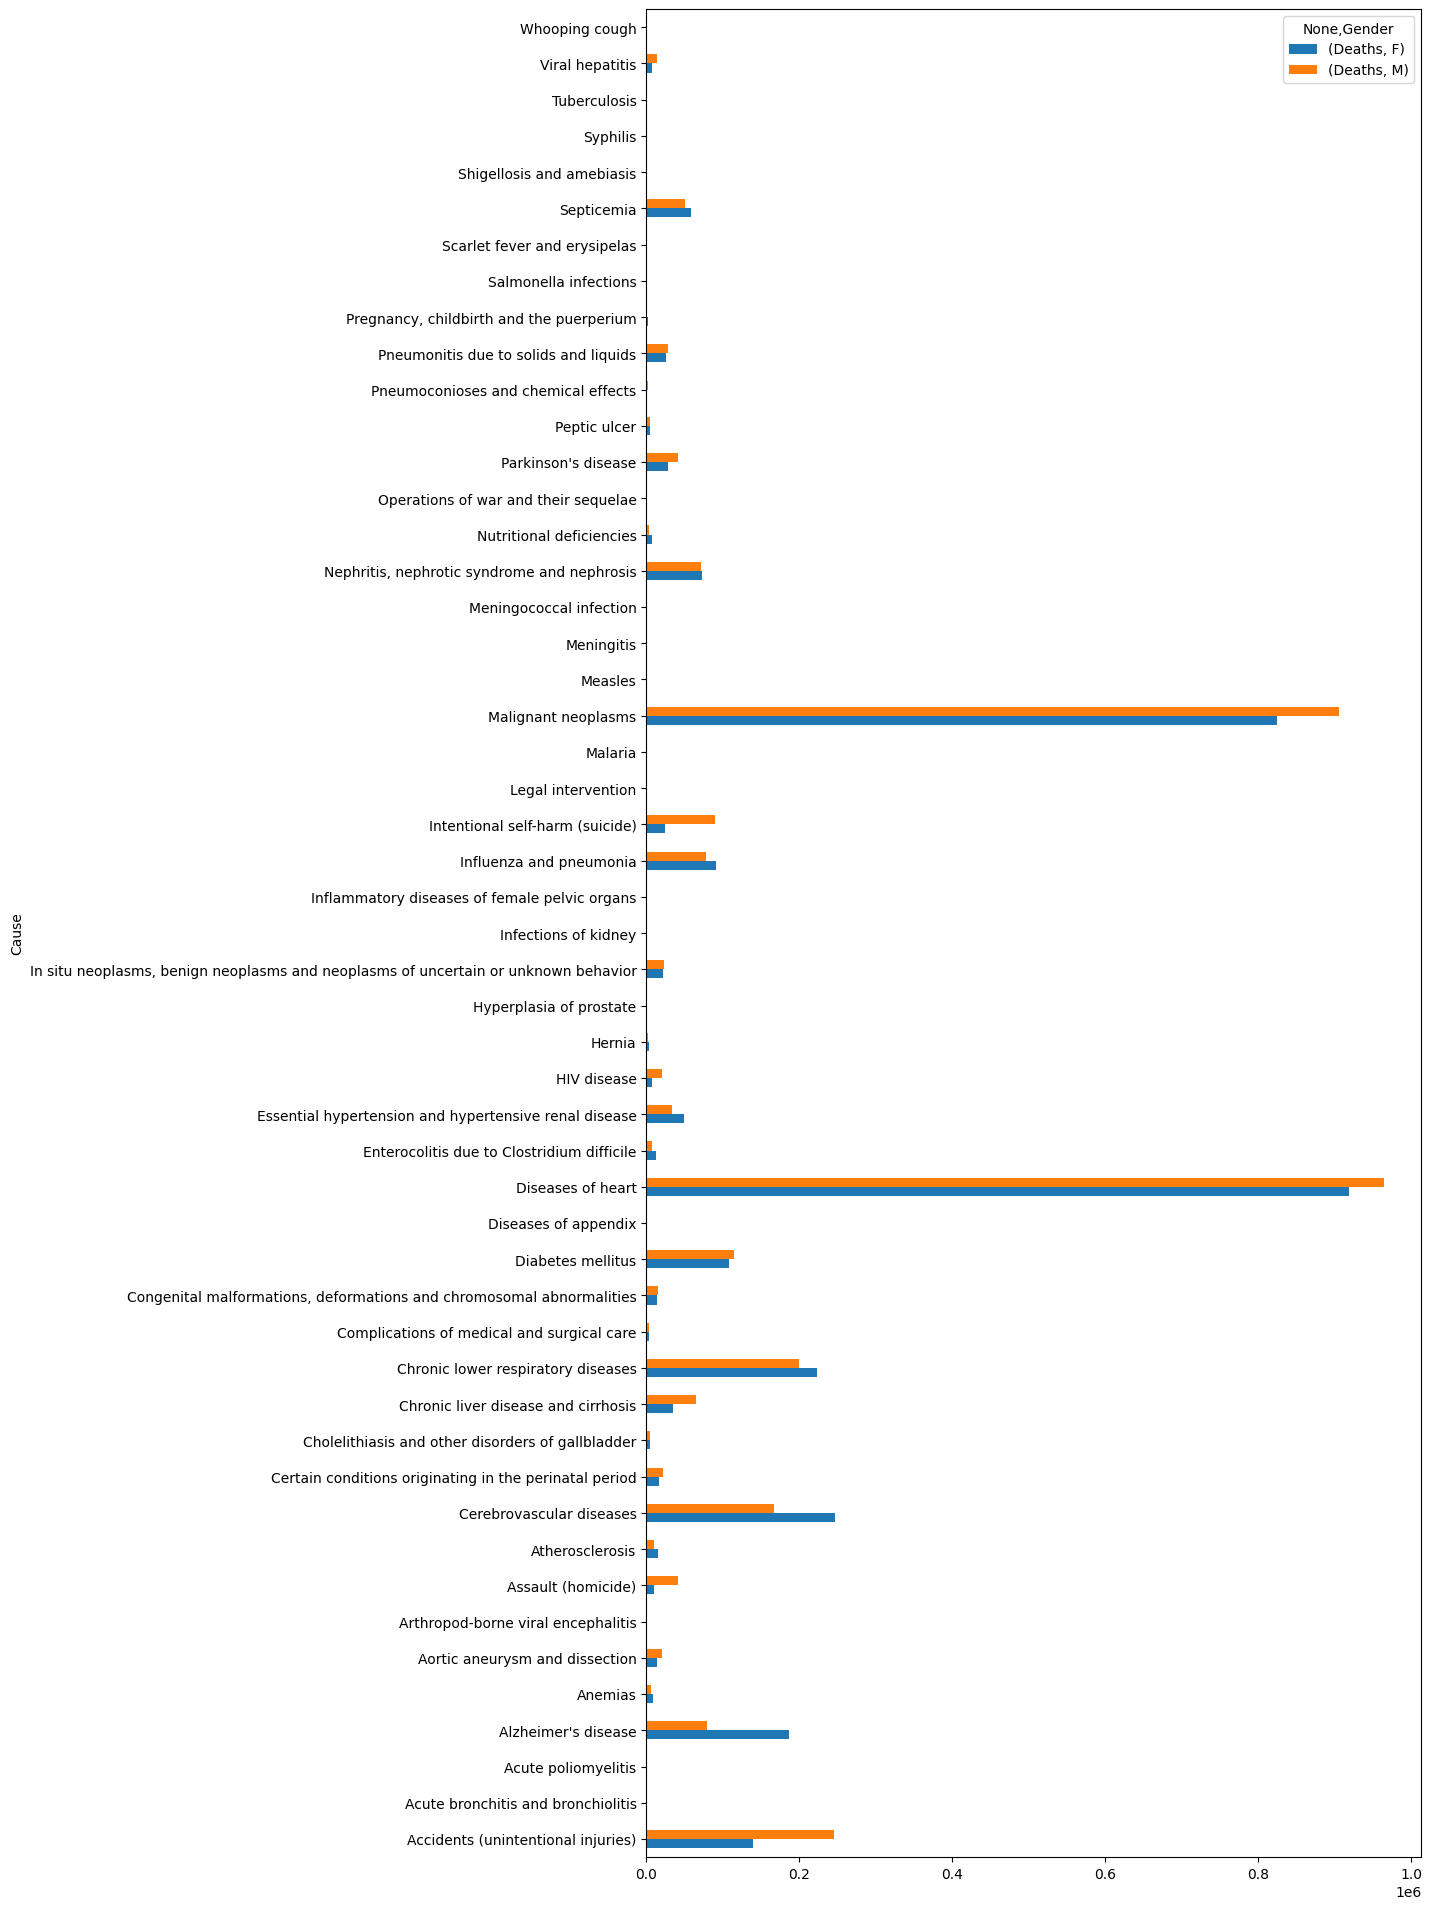

In [33]:
df\
.groupby(['Cause', 'Gender'])\
.agg({'Deaths': 'sum'})\
.sort_values('Deaths', ascending=True)\
.unstack(1)\
.plot(kind='barh', legend=True, figsize=[10, 24])

## Mortality: Causes of death by age

Since the dataset contains a large number of causes of death, I've selected only a few for visualization:

- "Alzheimer's disease"
- "Diseases of heart"
- "Malignant neoplasms"
- "Accidents (unintentional injuries)"

<Axes: xlabel='Age'>

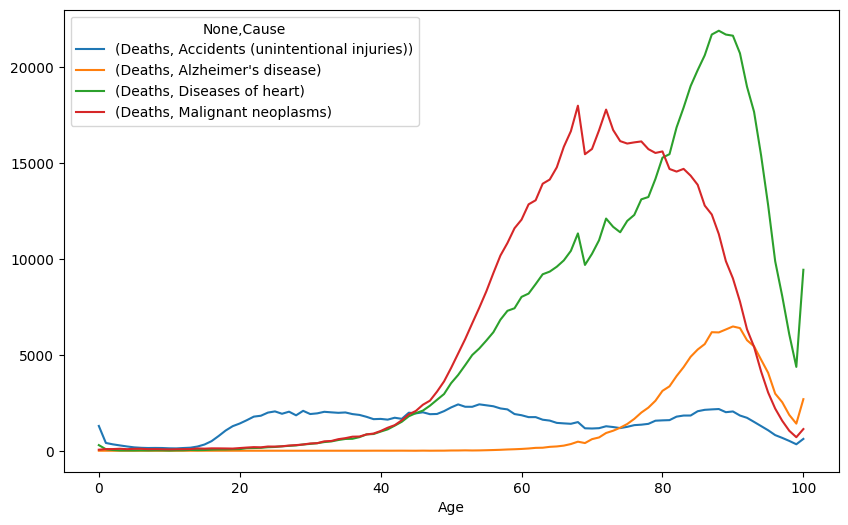

In [34]:
clist = ["Alzheimer's disease", 
         "Diseases of heart", 
         "Malignant neoplasms", 
         "Accidents (unintentional injuries)"]

df2015_clist = df2015[df2015["Cause"].isin(clist)] #isin

df2015_clist\
.groupby(["Age", "Cause"])\
.agg({'Deaths': 'sum'})\
.sort_values('Deaths', ascending=False)\
.unstack(1)\
.plot(kind="line", legend=True, figsize=[10, 6])

<font color="green"> **Conclusions**: </font>
1. Mortality due to unintentional injuries is almost constant.
2. Mortality due to Alzheimer's disease remains constant until 70 years old, then increases until 90 years old, and decreases afterward.
3. Mortality due to heart diseases increases from 19 years old to 90. It then sharply decreases after 90.
4. Mortality due to malignant neoplasms increases from 20 years old to 70. It then sharply decreases after 70.

## Mortality: causes of death by gender and age

Creating such a visualization is quite challenging because there are 2 genders x 3 years x 51 causes of death. It's practically impossible to represent all this data on one graph and analyze it.

The best approach would be to visualize only a portion of the data or just the most interesting information.

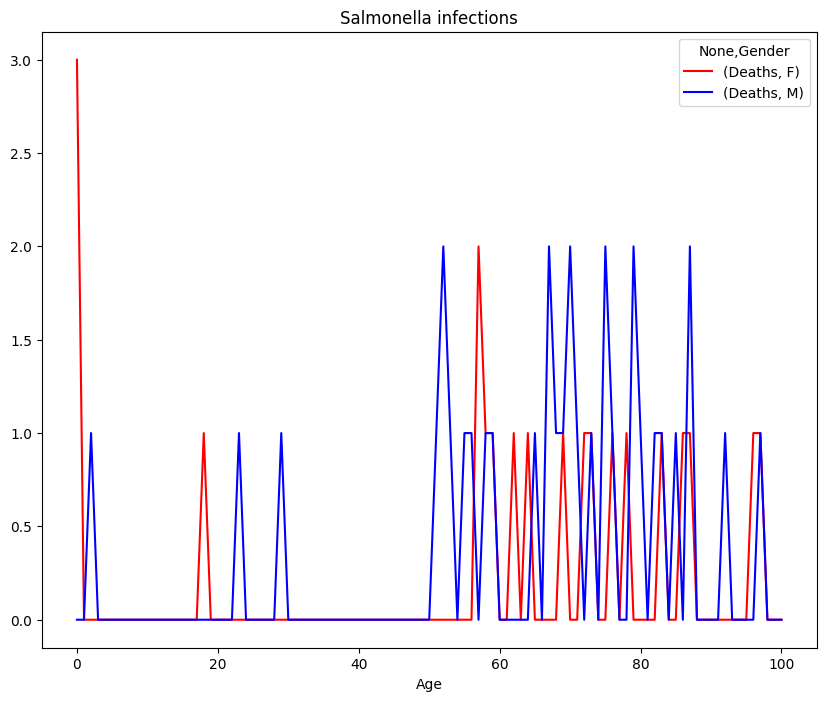

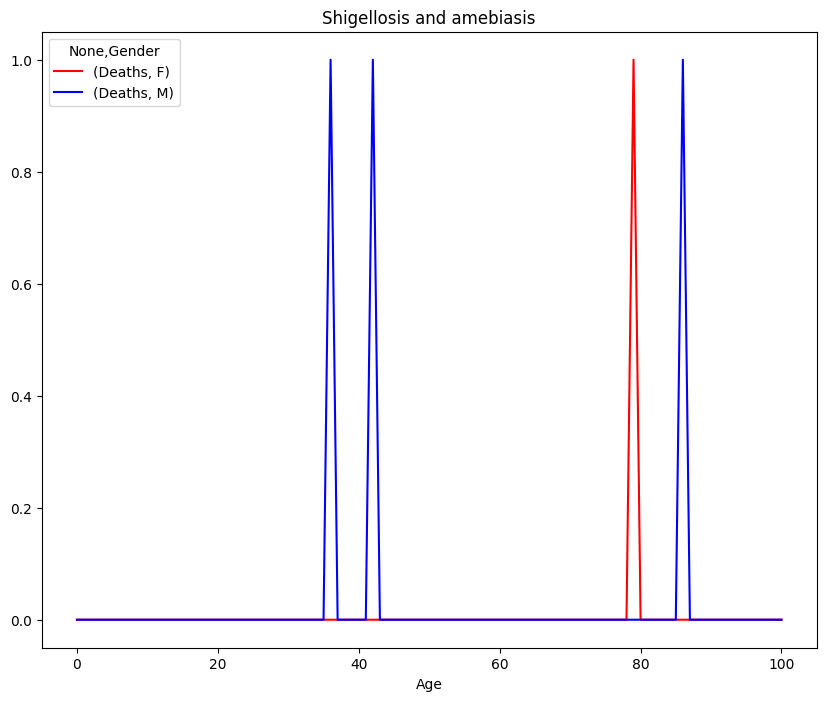

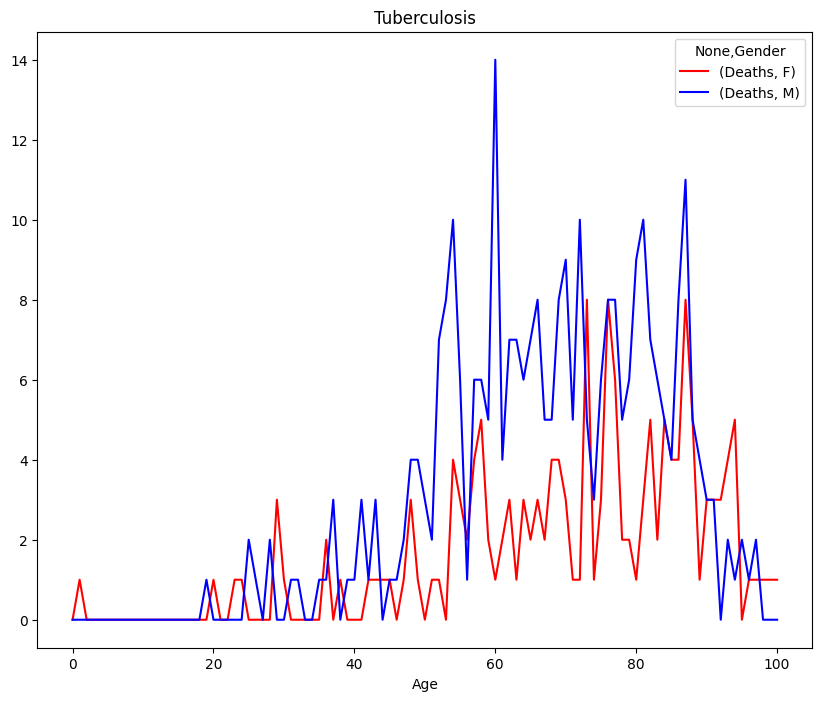

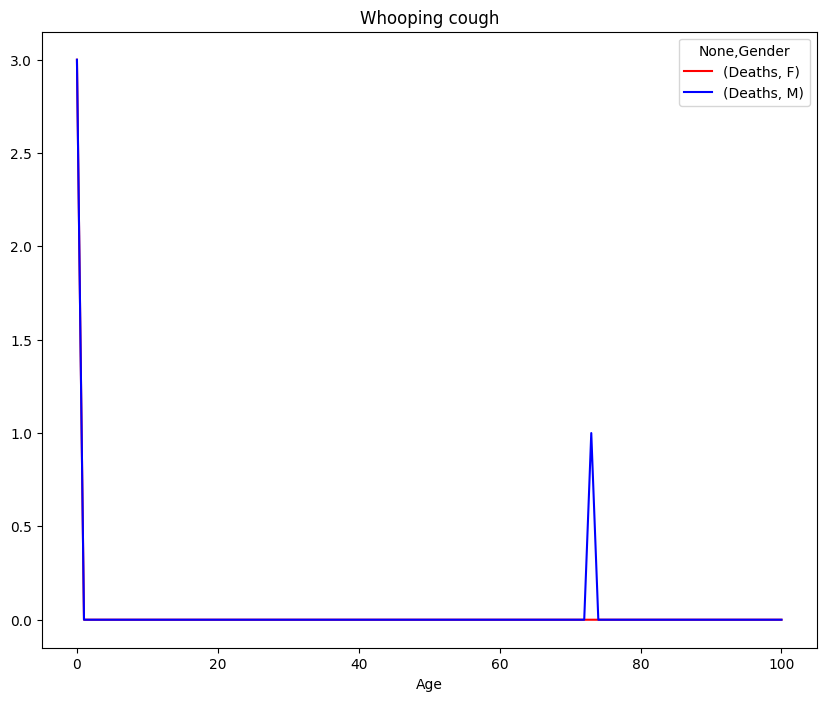

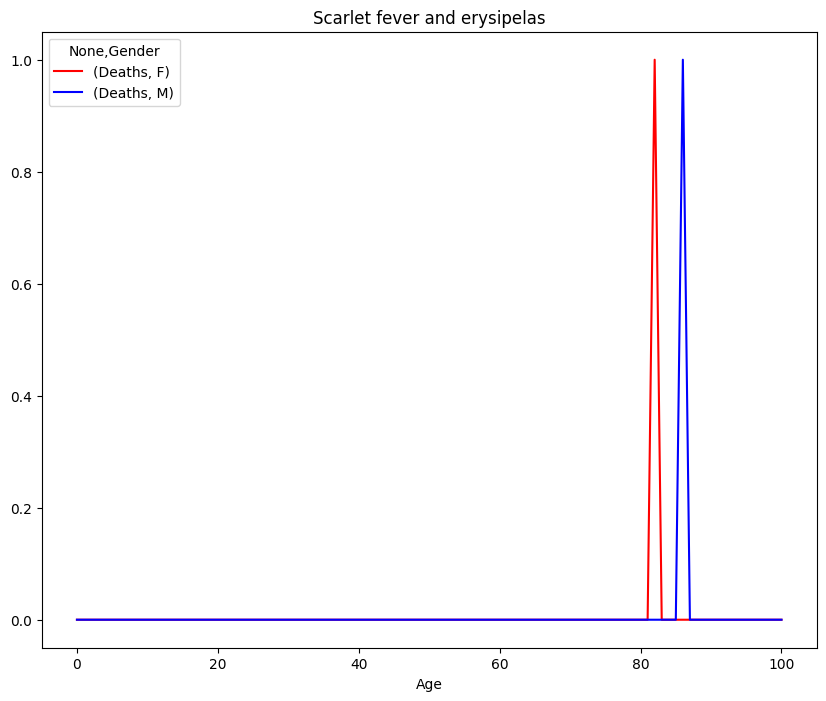

In [36]:
clist = df.Cause.unique()[:5]

for cause in clist:
    df2015_clist = df2015[df2015["Cause"].isin([cause])]
    
    df2015_clist\
    .groupby(["Age", "Gender"])\
    .agg({'Deaths': 'sum'})\
    .unstack([1])\
    .plot(kind="line", legend=True, color=('r', 'b'), figsize=[10, 8], title=str(cause))

<font color="green">**Overall conclusions**:</font>
1. The most common causes of death across all years are heart diseases and malignant neoplasms.
2. The least common are acute poliomyelitis; arthropod-borne viral encephalitis; measles; scarlet fever; and diphtheria.
3. The number of deaths is generally higher among men than women.
4. Mortality due to unintentional injuries remains almost constant throughout life, depending on Alzheimer's disease, heart diseases, and neoplasms.
5. Higher mortality is observed among both men and women from 75 to 100 years old.